# Introduction

*   Titre du projet : Étude de marché pour "La poule qui chante"
*   Objectif : Identifier des groupements de pays pour une potentielle exportation de poulets bios.
*   Période cible : Année 2017 pour assurer la cohérence des données.











# Importation des bibliothèques et configuration


In [1]:
!pip install pycountry

# Imports de base
import pandas as pd
import numpy as np
import pycountry
import seaborn as sns
# Pour les graphiques
import matplotlib.pyplot as plt

# pour gérer les warnings
import warnings
warnings.filterwarnings('ignore')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.3 MB/s eta 0:00:00


# Chargement des données

In [2]:
# Lecture des différents fichiers CSV
df_population = pd.read_csv("Population_2000_2018.csv")
df_dispo_alim = pd.read_csv("DisponibiliteAlimentaire_2017.csv")
df_production = pd.read_csv("ProductionPoulet2017.csv")
df_consommation = pd.read_csv("ConsommationVolaille_2017.csv")
df_stabilite = pd.read_csv("StabilitePolitique_2017.csv", skiprows=3)
df_pib = pd.read_csv("PIB_2017.csv")
df_distance = pd.read_excel("dist_cepii.xls")


df_imp_afrique = pd.read_csv("ImportPoulet_Afrique_2017.csv")
df_imp_amerique = pd.read_csv("ImportPoulet_Amérique_2017.csv")
df_imp_asie = pd.read_csv("ImportPoulet_Asie_2017.csv")
df_imp_europe = pd.read_csv("ImportPoulet_Europe_2017.csv")
df_imp_oceanie = pd.read_csv("ImportPoulet_Océanie_2017.csv")

In [3]:
# Fonction pour convertir les codes ISO Alpha-3 en noms de pays
def iso_to_country(iso_code):
    """ Convertit un code ISO Alpha-3 en nom de pays complet """
    try:
        return pycountry.countries.get(alpha_3=iso_code).name
    except:
        return iso_code  # Si le code n'est pas trouvé, on le garde tel quel

# Appliquer la conversion sur la colonne 'Zone' de df_distance
df_distance['iso_o'] = df_distance['iso_o'].apply(iso_to_country)



In [4]:
# Fusion (concat) de tous les DataFrames d’importation
df_importations = pd.concat([
    df_imp_afrique,
    df_imp_amerique,
    df_imp_asie,
    df_imp_europe,
    df_imp_oceanie
], ignore_index=True)

# Nettoyage et préparation des données

In [5]:
# dimension de chaque DataFrame
print("dimension des dataframes")
print("Population :", df_population.shape)
print("DispoAlim :", df_dispo_alim.shape)
print("Production :", df_production.shape)
print("Consommation :", df_consommation.shape)
print("stabilite :", df_stabilite.shape)
print("PIB :", df_pib.shape)
print("Importations :", df_importations.shape)
print("Distance :", df_distance.shape)
print("\n")

dimension des dataframes
Population : (4411, 15)
DispoAlim : (176600, 14)
Production : (196, 15)
Consommation : (181, 15)
stabilite : (266, 69)
PIB : (211, 15)
Importations : (1783, 16)
Distance : (50176, 14)




In [6]:
# Aperçu des premiers enregistrements pour chaque DataFrame
print("----- Aperçu rapide des DataFrames -----")

print("\nPopulation :")
display(df_population.head(3))

print("\nDisponibilité Alimentaire :")
display(df_dispo_alim.head(3))

print("\nProduction de Poulet :")
display(df_production.head(3))

print("\nConsommation Volaille :")
display(df_consommation.head(3))

print("\nStabilité politique :")
display(df_stabilite.head(3))

print("\nPIB :")
display(df_pib.head(3))

print("\nImportations (toutes régions confondues) :")
display(df_importations.head(3))

print("\nDistance :")
display(df_distance.head(3))


----- Aperçu rapide des DataFrames -----

Population :


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN



Disponibilité Alimentaire :


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées



Production de Poulet :


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,QCL,Cultures et produits animaux,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,27637.84,I,Valeur imputée,NaN
1,QCL,Cultures et produits animaux,710,Afrique du Sud,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,1658159.00,A,Chiffre officiel,NaN
2,QCL,Cultures et produits animaux,8,Albanie,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,12912.00,A,Chiffre officiel,NaN



Consommation Volaille :


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FBS),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,S2734,Viande de Volailles,2017,2017,kcal/personne,1.79,E,Valeur estimée,NaN
1,FBS,Bilans Alimentaires (2010-),710,Afrique du Sud,645,Disponibilité alimentaire en quantité (kg/pers...,S2734,Viande de Volailles,2017,2017,kcal/personne,37.25,E,Valeur estimée,NaN
2,FBS,Bilans Alimentaires (2010-),8,Albanie,645,Disponibilité alimentaire en quantité (kg/pers...,S2734,Viande de Volailles,2017,2017,kcal/personne,11.55,E,Valeur estimée,NaN



Stabilité politique :


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,...,92.380951,93.333336,95.238098,95.283020,95.754715,96.226418,97.169815,97.641510,97.630333,NaN
1,NaN,AFE,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,...,0.952381,0.952381,0.476190,0.471698,0.943396,0.471698,1.415094,0.943396,1.421801,NaN



PIB :


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,534.020133,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,6723.928582,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,4521.752217,X,Ciffre de sources internationales,NaN



Importations (toutes régions confondues) :


,Code Domaine,Domaine,Code pays déclarant (M49),Pays déclarants,Code pays partenaire (M49),Pays partenaires,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TM,Matrices du commerce détaillées,710,Afrique du Sud,748,Eswatini,5610,Importations - quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,24.38,A,Chiffre officiel
1,TM,Matrices du commerce détaillées,710,Afrique du Sud,426,Lesotho,5610,Importations - quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,0.31,A,Chiffre officiel
2,TM,Matrices du commerce détaillées,710,Afrique du Sud,516,Namibie,5610,Importations - quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,0.20,A,Chiffre officiel



Distance :


,iso_o,iso_d,contig,comlang_off,comlang_ethno,colony,comcol,curcol,col45,smctry,dist,distcap,distw,distwces
0,Aruba,ABW,0,0,0,0,0,0,0,0,5.225315,5.225315,25.09354,23.04723
1,Aruba,AFG,0,0,0,0,0,0,0,0,13257.810000,13257.810000,13168.22,13166.37
2,Aruba,AGO,0,0,0,0,0,0,0,0,9516.913000,9516.913000,9587.316,9584.193


In [7]:
# Extraction des distances des pays par rapport à la France
df_distance = df_distance[(df_distance['iso_o'] == 'FRA') | (df_distance['iso_d'] == 'FRA')]

# Sélection des colonnes importantes
df_distance = df_distance[['iso_o', 'iso_d', 'distcap']]

# Renommage des colonnes pour plus de clarté
df_distance.rename(columns={'iso_o': 'Pays_A', 'iso_d': 'Pays_B', 'distcap': 'Distance_France (km)'}, inplace=True)

# Identifier le pays qui n'est pas la France
df_distance['Zone'] = df_distance.apply(lambda row: row['Pays_A'] if row['Pays_B'] == 'FRA' else row['Pays_B'], axis=1)

# Garder uniquement la distance du pays par rapport à la France
df_distance = df_distance[['Zone', 'Distance_France (km)']]

# Vérification rapide
print("\nAperçu des distances avec la France :")
display(df_distance.head(5))




Aperçu des distances avec la France :


,Zone,Distance_France (km)
67,Aruba,7685.884
291,Afghanistan,5590.381
515,Angola,6510.322
739,Anguilla,6710.570
963,Albania,1603.534


In [8]:
# Sélection des colonnes essentielles pour chaque DataFrame :

# Population
df_population = df_population[['Zone', 'Année', 'Valeur']]

# Disponibilité alimentaire
df_dispo_alim = df_dispo_alim[['Zone', 'Produit', 'Élément', 'Valeur']]

# Production de poulet
df_production = df_production[['Zone', 'Valeur']]

# Consommation volaille
df_consommation = df_consommation[['Zone', 'Valeur']]

# Stabilité politique
df_stabilite = df_stabilite[['Country Name', '2017']]

# PIB
df_pib = df_pib[['Zone', 'Valeur']]

# Importations poulet
df_importations = df_importations[['Pays déclarants', 'Valeur']]




In [9]:
# Renommage clair des colonnes pour faciliter la fusion

df_population.rename(columns={'Valeur': 'Population (1000 hab)'}, inplace=True)
df_production.rename(columns={'Valeur': 'Production poulet (tonnes)'}, inplace=True)
df_consommation.rename(columns={'Valeur': 'Consommation volaille (kcal/personne/jour)'}, inplace=True)
df_stabilite.rename(columns={'Country Name': 'Zone','2017': 'Stabilité politique (%)'}, inplace=True)
df_pib.rename(columns={'Valeur': 'PIB par habitant (USD)'}, inplace=True)
df_importations.rename(columns={'Pays déclarants':'Zone','Valeur': 'Importation poulet (tonnes)'}, inplace=True)



In [10]:
print("\nVérification des valeurs manquantes :")

print("\nDISTANCE :")
print(df_distance.isna().sum())

print("\nPOPULATION :")
print(df_population.isna().sum())

print("\nSTABILITÉ :")
print(df_stabilite.isna().sum())

print("\nPIB :")
print(df_pib.isna().sum())

print("\nCONSOMMATION :")
print(df_consommation.isna().sum())

print("\nPRODUCTION :")
print(df_production.isna().sum())

print("\nDISPO_ALIM :")
print(df_dispo_alim.isna().sum())

print("\nIMPORTATIONS :")
print(df_importations.isna().sum())



Vérification des valeurs manquantes :

DISTANCE :
Zone                    0
Distance_France (km)    0
dtype: int64

POPULATION :
Zone                     0
Année                    0
Population (1000 hab)    0
dtype: int64

STABILITÉ :
Zone                        2
Stabilité politique (%)    61
dtype: int64

PIB :
Zone                      0
PIB par habitant (USD)    0
dtype: int64

CONSOMMATION :
Zone                                          0
Consommation volaille (kcal/personne/jour)    0
dtype: int64

PRODUCTION :
Zone                          0
Production poulet (tonnes)    0
dtype: int64

DISPO_ALIM :
Zone       0
Produit    0
Élément    0
Valeur     0
dtype: int64

IMPORTATIONS :
Zone                           0
Importation poulet (tonnes)    0
dtype: int64


#Agrégation des importations par pays

In [11]:
#Additionner les valeurs d'importation par pays
df_importations = df_importations.groupby("Zone", as_index=False)["Importation poulet (tonnes)"].sum()


# Harmonisation des noms de pays

In [12]:
# Identifier les noms de pays dans chaque dataframe
zones_population = set(df_population["Zone"])
zones_distance = set(df_distance["Zone"])

# Trouver les pays présents dans df_distance mais absents de df_population
pays_absents = zones_distance - zones_population
print("Pays présents dans df_distance mais absents de df_population :", pays_absents)


Pays présents dans df_distance mais absents de df_population : {'Georgia', 'New Zealand', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Belgium', 'Libya', 'Bermuda', 'Cayman Islands', 'Malta', 'Iceland', 'YUG', 'Norfolk Island', "Korea, Democratic People's Republic of", 'Morocco', 'Ecuador', 'Senegal', 'Mongolia', 'Turks and Caicos Islands', 'Germany', 'Finland', 'United Kingdom', 'China', 'Somalia', 'Sweden', 'Belarus', 'Pitcairn', 'Palau', 'India', 'Micronesia, Federated States of', 'Norway', 'Solomon Islands', 'Kuwait', 'Falkland Islands (Malvinas)', 'Jamaica', 'Fiji', 'Wallis and Futuna', 'Dominica', 'Niue', 'Trinidad and Tobago', 'Turkmenistan', 'ROM', 'Hong Kong', 'Eritrea', 'Switzerland', 'Iran, Islamic Republic of', 'Tokelau', 'Haiti', 'United States', 'Japan', "Lao People's Democratic Republic", 'Croatia', 'Thailand', 'Uganda', 'Guinea-Bissau', 'ANT', 'Sudan', 'Sao Tome and Principe', 'Ireland', 'Central African Republic', 

In [13]:
# Dictionnaire de correspondance pour harmoniser les noms des pays
correction_pays = {
    "YUG": "Yougoslavie",
    "Cook Islands": "Îles Cook",
    "Netherlands": "Pays-Bas",
    "New Zealand": "Nouvelle-Zélande",
    "Dominican Republic": "République dominicaine",
    "United States": "États-Unis d'Amérique",
    "French Guiana": "Guyane française",
    "Marshall Islands": "Îles Marshall",
    "Bulgaria": "Bulgarie",
    "Cape Verde": "Cabo Verde",
    "Norway": "Norvège",
    "Uganda": "Ouganda",
    "China": "Chine, continentale",
    "Ecuador": "Équateur",
    "Micronesia, Federated States of": "Micronésie (États fédérés de)",
    "Kuwait": "Koweït",
    "Slovenia": "Slovénie",
    "Christmas Island": "Île Christmas",
    "ANT": "Antilles néerlandaises (ex)",
    "Western Sahara": "Sahara occidental",
    "Barbados": "Barbade",
    "Indonesia": "Indonésie",
    "Australia": "Australie",
    "Bermuda": "Bermudes",
    "Romania": "Roumanie",
    "Mauritius": "Maurice",
    "Tajikistan": "Tadjikistan",
    "Equatorial Guinea": "Guinée équatoriale",
    "Cyprus": "Chypre",
    "Somalia": "Somalie",
    "Wallis and Futuna": "Wallis-et-Futuna",
    "Dominica": "Dominique",
    "Nigeria": "Nigéria",
    "Greenland": "Groenland",
    "Moldova, Republic of": "République de Moldova",
    "Turkmenistan": "Turkménistan",
    "Albania": "Albanie",
    "Solomon Islands": "Îles Salomon",
    "Ethiopia": "Éthiopie",
    "Saint Lucia": "Sainte-Lucie",
    "India": "Inde",
    "Slovakia": "Slovaquie",
    "San Marino": "Saint-Marin",
    "Colombia": "Colombie",
    "Turks and Caicos Islands": "Îles Turques-et-Caïques",
    "Algeria": "Algérie",
    "South Africa": "Afrique du Sud",
    "Brazil": "Brésil",
    "Morocco": "Maroc",
    "New Caledonia": "Nouvelle-Calédonie",
    "Georgia": "Géorgie",
    "Ireland": "Irlande",
    "Eritrea": "Érythrée",
    "Japan": "Japon",
    "Grenada": "Grenade",
    "Mauritania": "Mauritanie",
    "Chile": "Chili",
    "Iran, Islamic Republic of": "Iran (République islamique d')",
    "Italy": "Italie",
    "Korea, Democratic People's Republic of": "République populaire démocratique de Corée",
    "Sao Tome and Principe": "Sao Tomé-et-Principe",
    "Uzbekistan": "Ouzbékistan",
    "Tokelau": "Tokélaou",
    "Syrian Arab Republic": "République arabe syrienne",
    "Benin": "Bénin",
    "Haiti": "Haïti",
    "Niue": "Nioué",
    "Tanzania, United Republic of": "République-Unie de Tanzanie",
    "Malta": "Malte",
    "Poland": "Pologne",
    "Iceland": "Islande",
    "Liberia": "Libéria",
    "Mongolia": "Mongolie",
    "Zambia": "Zambie",
    "Singapore": "Singapour",
    "Northern Mariana Islands": "Îles Mariannes du Nord",
    "Puerto Rico": "Porto Rico",
    "Peru": "Pérou",
    "Zaire": "Zaïre",
    "French Polynesia": "Polynésie française",
    "North Macedonia": "Macédoine du Nord",
    "Estonia": "Estonie",
    "Timor-Leste": "Timor oriental",
    "Norfolk Island": "Île Norfolk",
    "Denmark": "Danemark",
    "Palau": "Palaos",
    "United Kingdom": "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
    "Lao People's Democratic Republic": "République démocratique populaire lao",
    "Bosnia and Herzegovina": "Bosnie-Herzégovine",
    "Czechia": "Tchéquie",
    "Switzerland": "Suisse",
    "Israel": "Israël",
    "Senegal": "Sénégal",
    "Greece": "Grèce",
    "Malaysia": "Malaisie",
    "Russian Federation": "Fédération de Russie",
    "Virgin Islands, British": "Îles Vierges britanniques",
    "Jamaica": "Jamaïque",
    "Cocos (Keeling) Islands": "Îles Cocos (Keeling)",
    "Cambodia": "Cambodge",
    "Falkland Islands (Malvinas)": "Îles Falkland (Malvinas)",
    "Armenia": "Arménie",
    "Andorra": "Andorre",
    "United Arab Emirates": "Émirats arabes unis",
    "Nepal": "Népal",
    "Bahrain": "Bahreïn",
    "Libya": "Libye",
    "Lithuania": "Lituanie",
    "Lebanon": "Liban",
    "Thailand": "Thaïlande",
    "Azerbaijan": "Azerbaïdjan",
    "Papua New Guinea": "Papouasie-Nouvelle-Guinée",
    "Tunisia": "Tunisie",
    "Pitcairn": "Îles Pitcairn",
    "Saint Helena, Ascension and Tristan da Cunha": "Sainte-Hélène, Ascension et Tristan da Cunha",
    "Venezuela, Bolivarian Republic of": "Venezuela (République bolivarienne du)",
    "Germany": "Allemagne",
    "Guinea": "Guinée",
    "Jordan": "Jordanie",
    "Argentina": "Argentine",
    "Latvia": "Lettonie",
    "Korea, Republic of": "République de Corée",
    "Austria": "Autriche",
    "Belarus": "Bélarus",
    "Finland": "Finlande",
    "Mexico": "Mexique",
    "Saudi Arabia": "Arabie saoudite",
    "Faroe Islands": "Îles Féroé",
    "Belgium": "Belgique",
    "Croatia": "Croatie",
    "Sweden": "Suède",
    "Yemen": "Yémen",
    "Chad": "Tchad",
    "Fiji": "Fidji",
    "Spain": "Espagne",
    "Guinea-Bissau": "Guinée-Bissau",
    "Kyrgyzstan": "Kirghizistan",
    "PAL": "Palestine",
    "Cayman Islands": "Îles Caïmans",
    "Cameroon": "Cameroun",
    "Hungary": "Hongrie",
    "Bhutan": "Bhoutan",
    "Namibia": "Namibie",
    "Saint Pierre and Miquelon": "Saint-Pierre-et-Miquelon",
    "Sudan": "Soudan",
    "Eswatini": "Eswatini",
    "Bolivia, Plurinational State of": "Bolivie (État plurinational de)",
    "Gambia": "Gambie",
    "Trinidad and Tobago": "Trinité-et-Tobago",
    "Antigua and Barbuda": "Antigua-et-Barbuda",
    "Egypt": "Égypte",
    "Hong Kong": "Chine - RAS de Hong-Kong",
    "Saint Kitts and Nevis": "Saint-Kitts-et-Nevis",
    "Saint Vincent and the Grenadines": "Saint-Vincent-et-les-Grenadines",
    "Macao": "Chine - RAS de Macao",
    "Taiwan, Province of China": "Chine, Taiwan Province de",
    "Central African Republic": "République centrafricaine",
    "Türkiye": "Turquie"
}



In [14]:
# Appliquer l’harmonisation des noms de pays sur tous les DataFrames
dataframes = [df_distance, df_population, df_stabilite, df_pib, df_consommation, df_production, df_dispo_alim, df_importations]

for df in dataframes:
    df["Zone"] = df["Zone"].replace(correction_pays)


In [15]:
# Vérifier que tous les DataFrames ont bien les mêmes pays
pays_ref = set(df_population["Zone"])  # Prendre df_population comme référence

for name, df in zip(["DISTANCE", "POPULATION", "STABILITÉ", "PIB", "CONSOMMATION", "PRODUCTION", "DISPO_ALIM", "IMPORTATIONS"], dataframes):
    pays_absents = pays_ref - set(df["Zone"])  # Vérifier quels pays manquent dans chaque DataFrame
    print(f"Pays absents dans {name} :", pays_absents)


Pays absents dans DISTANCE : {'République démocratique du Congo', 'Guam', 'Serbie-et-Monténégro', 'Brunéi Darussalam', 'Îles Wallis-et-Futuna', 'Îles Caïmanes', 'Timor oriental', 'Saint-Martin (partie française)', 'Saint-Siège', 'Îles Anglo-Normandes', 'Monaco', 'Île de Man', 'Sint Maarten  (partie néerlandaise)', 'Curaçao', 'Monténégro', 'Serbie', 'Roumanie', 'Soudan (ex)', 'Soudan du Sud', 'Comores', 'Mayotte', 'Îles Vierges américaines', 'Liechtenstein', 'Saint-Barthélemy', 'Saint-Vincent-et-les Grenadines', 'Samoa américaines', 'Bonaire, Saint-Eustache et Saba'}
Pays absents dans POPULATION : set()
Pays absents dans STABILITÉ : {'Chine - RAS de Hong-Kong', 'Palestine', 'République démocratique du Congo', 'Îles Mariannes du Nord', 'Chine, Taiwan Province de', 'République-Unie de Tanzanie', 'Tokélaou', 'Serbie-et-Monténégro', 'Îles Wallis-et-Futuna', 'Sahara occidental', 'Tchéquie', "Iran (République islamique d')", 'Îles Caïmanes', 'République de Corée', 'Saint-Martin (partie frança

#  Filtrage des pays avec des données complètes

In [16]:
# Liste des pays ayant une stabilité politique renseignée
pays_valides = df_stabilite["Zone"].dropna().unique()  # Supprime les NaN et extrait les pays valides

# Appliquer le filtrage sur chaque dataset individuellement
df_distance = df_distance[df_distance["Zone"].isin(pays_valides)]
df_population = df_population[df_population["Zone"].isin(pays_valides)]
df_stabilite = df_stabilite[df_stabilite["Zone"].isin(pays_valides)]
df_pib = df_pib[df_pib["Zone"].isin(pays_valides)]
df_consommation = df_consommation[df_consommation["Zone"].isin(pays_valides)]
df_production = df_production[df_production["Zone"].isin(pays_valides)]
df_dispo_alim = df_dispo_alim[df_dispo_alim["Zone"].isin(pays_valides)]
df_importations = df_importations[df_importations["Zone"].isin(pays_valides)]

# Vérification après suppression
print("Nombre de pays après suppression des pays sans stabilité politique renseignée :")
print("DISTANCE :", df_distance["Zone"].nunique())
print("POPULATION :", df_population["Zone"].nunique())
print("STABILITÉ :", df_stabilite["Zone"].nunique())
print("PIB :", df_pib["Zone"].nunique())
print("CONSOMMATION :", df_consommation["Zone"].nunique())
print("PRODUCTION :", df_production["Zone"].nunique())
print("DISPO_ALIM :", df_dispo_alim["Zone"].nunique())
print("IMPORTATIONS :", df_importations["Zone"].nunique())

Nombre de pays après suppression des pays sans stabilité politique renseignée :
DISTANCE : 176
POPULATION : 189
STABILITÉ : 264
PIB : 183
CONSOMMATION : 160
PRODUCTION : 170
DISPO_ALIM : 155
IMPORTATIONS : 135


In [17]:
# Trouver les pays communs entre tous les DataFrames
pays_communs = set(df_distance["Zone"])
for df in [df_population, df_stabilite, df_pib, df_consommation, df_production, df_dispo_alim, df_importations]:
    pays_communs &= set(df["Zone"])

print("Nombre de pays communs entre tous les fichiers :", len(pays_communs))


Nombre de pays communs entre tous les fichiers : 121


# Filtrage disponibilité alimentaire

In [18]:
# Afficher toutes les valeurs uniques de la colonne "Produit"
print(df_dispo_alim["Produit"].unique())


['Blé et produits' 'Riz et produits' 'Orge et produits' 'Maïs et produits'
 'Seigle et produits' 'Avoine' 'Millet et produits' 'Sorgho et produits'
 'Céréales, Autres' 'Pommes de Terre et produits' 'Ignames' 'Racines nda'
 'Sucre, canne' 'Sucre, betterave' 'Sucre Eq Brut' 'Edulcorants Autres'
 'Miel' 'Haricots' 'Pois' 'Légumineuses Autres et produits'
 'Noix et produits' 'Soja' 'Arachides Decortiquees' 'Graines de tournesol'
 'Graines Colza/Moutarde' 'Graines de coton' 'Coco (Incl Coprah)' 'Sésame'
 'Olives' 'Plantes Oleiferes, Autre' 'Huile de Soja' "Huile d'Arachide"
 'Huile de Tournesol' 'Huile de Colza&Moutarde' 'Huile Graines de Coton'
 'Huile de Palmistes' 'Huile de Palme' 'Huile de Coco' 'Huile de Sésame'
 "Huile d'Olive" 'Huile de Son de Riz' 'Huile de Germe de Maïs'
 'Huil Plantes Oleif Autr' 'Tomates et produits' 'Oignons'
 'Légumes, Autres' 'Oranges, Mandarines' 'Citrons & Limes et produits'
 'Pamplemousse et produits' 'Agrumes, Autres' 'Bananes'
 'Pommes et produits' 'Anana

In [19]:
df_dispo_alim = df_dispo_alim[df_dispo_alim["Produit"] == "Viande de Volailles"]


In [20]:
print(df_dispo_alim["Produit"].unique())


['Viande de Volailles']


In [21]:
# Afficher toutes les valeurs uniques de la colonne "Élément"
print("Valeurs uniques dans la colonne 'Élément' :")
print(df_dispo_alim["Élément"].unique())


Valeurs uniques dans la colonne 'Élément' :
['Production' 'Importations - Quantité' 'Variation de stock'
 'Disponibilité intérieure' 'Pertes' 'Résidus' 'Nourriture'
 'Disponibilité alimentaire en quantité (kg/personne/an)'
 'Disponibilité alimentaire (Kcal/personne/jour)'
 'Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de matière grasse en quantité (g/personne/jour)'
 'Exportations - Quantité' 'Alimentation pour touristes' 'Traitement'
 'Autres utilisations (non alimentaire)' 'Aliments pour animaux'
 'Semences']


In [22]:
# Filtrer df_dispo_alim pour ne garder que la disponibilité alimentaire en kcal/personne/jour
df_dispo_alim_poulet = df_dispo_alim[(df_dispo_alim["Produit"] == "Viande de Volailles") &
                                     (df_dispo_alim["Élément"] == "Disponibilité alimentaire (Kcal/personne/jour)")]

# Ne garder que les colonnes utiles
df_dispo_alim_poulet = df_dispo_alim_poulet[['Zone', 'Valeur']]

# Renommer la colonne Valeur
df_dispo_alim_poulet.rename(columns={"Valeur": "Disponibilité alimentaire poulet (kcal/personne/jour)"}, inplace=True)

# Vérification rapide
display(df_dispo_alim_poulet.head())


,Zone,Disponibilité alimentaire poulet (kcal/personne/jour)
659,Afghanistan,5.0
1714,Afrique du Sud,143.0
2721,Albanie,85.0
3782,Algérie,22.0
4882,Allemagne,71.0


 # Fusionner les données

In [23]:
# Fusionner les données sur le critère "Zone"
df_final = df_distance \
    .merge(df_population, on="Zone", how="left") \
    .merge(df_pib, on="Zone", how="left") \
    .merge(df_consommation, on="Zone", how="left") \
    .merge(df_production, on="Zone", how="left") \
    .merge(df_importations, on="Zone", how="left") \
    .merge(df_dispo_alim_poulet, on="Zone", how="left") \
    .merge(df_stabilite, on="Zone", how="left")

# Vérification de la fusion
print("Aperçu des données fusionnées :")
display(df_final.head())

# Vérifier les valeurs manquantes après la fusion
print("\nValeurs manquantes après fusion :")
print(df_final.isna().sum())



Aperçu des données fusionnées :


,Zone,Distance_France (km),Année,Population (1000 hab),PIB par habitant (USD),Consommation volaille (kcal/personne/jour),Production poulet (tonnes),Importation poulet (tonnes),Disponibilité alimentaire poulet (kcal/personne/jour),Stabilité politique (%)
0,Aruba,7685.884,2000.0,90.853,29329.092343,NaN,NaN,NaN,NaN,95.238098
1,Aruba,7685.884,2001.0,92.898,29329.092343,NaN,NaN,NaN,NaN,95.238098
2,Aruba,7685.884,2002.0,94.992,29329.092343,NaN,NaN,NaN,NaN,95.238098
3,Aruba,7685.884,2003.0,97.017,29329.092343,NaN,NaN,NaN,NaN,95.238098
4,Aruba,7685.884,2004.0,98.737,29329.092343,NaN,NaN,NaN,NaN,95.238098



Valeurs manquantes après fusion :
Zone                                                       0
Distance_France (km)                                       0
Année                                                      1
Population (1000 hab)                                      1
PIB par habitant (USD)                                    58
Consommation volaille (kcal/personne/jour)               419
Production poulet (tonnes)                               267
Importation poulet (tonnes)                              894
Disponibilité alimentaire poulet (kcal/personne/jour)    514
Stabilité politique (%)                                  114
dtype: int64


 # Filtrer uniquement les données de l'année 2017

In [24]:
# Filtrer les données pour ne garder que l'année 2017
df_final = df_final[df_final["Année"] == 2017]

# Vérification après filtrage
print("Aperçu des données après filtrage sur 2017 :")
display(df_final.head())

# Vérifier les valeurs manquantes après le filtrage
print("\nValeurs manquantes après filtrage sur 2017 :")
print(df_final.isna().sum())


Aperçu des données après filtrage sur 2017 :


,Zone,Distance_France (km),Année,Population (1000 hab),PIB par habitant (USD),Consommation volaille (kcal/personne/jour),Production poulet (tonnes),Importation poulet (tonnes),Disponibilité alimentaire poulet (kcal/personne/jour),Stabilité politique (%)
17,Aruba,7685.8840,2017.0,105.366,29329.092343,NaN,NaN,NaN,NaN,95.238098
36,Afghanistan,5590.3810,2017.0,36296.113,534.020133,1.79,27637.84,28936.98,5.0,0.476190
55,Angola,6510.3220,2017.0,29816.766,4042.681382,10.51,40460.72,NaN,35.0,30.476191
74,Albanie,1603.5340,2017.0,2884.169,4521.752217,11.55,12912.00,17515.46,85.0,59.523811
93,Andorre,711.5485,2017.0,77.001,40632.206416,NaN,NaN,NaN,NaN,97.142860



Valeurs manquantes après filtrage sur 2017 :
Zone                                                      0
Distance_France (km)                                      0
Année                                                     0
Population (1000 hab)                                     0
PIB par habitant (USD)                                    3
Consommation volaille (kcal/personne/jour)               22
Production poulet (tonnes)                               14
Importation poulet (tonnes)                              47
Disponibilité alimentaire poulet (kcal/personne/jour)    27
Stabilité politique (%)                                   6
dtype: int64


#Vérification

In [25]:
print("Nombre de pays uniques dans df_final :", df_final["Zone"].nunique())


Nombre de pays uniques dans df_final : 175


In [26]:
print("Nombre de lignes avec au moins une valeur manquante :", df_final.isna().any(axis=1).sum())


Nombre de lignes avec au moins une valeur manquante : 55


In [27]:
print(df_final["Zone"].value_counts())


Zone
Aruba             1
Afghanistan       1
Angola            1
Albanie           1
Andorre           1
                 ..
Vanuatu           1
Samoa             1
Afrique du Sud    1
Zambie            1
Zimbabwe          1
Name: count, Length: 175, dtype: int64


In [28]:
# Vérifier combien de pays resteraient après suppression des pays incomplets
print("Nombre de pays restants après suppression :", df_final.dropna()["Zone"].nunique())
print("Population totale après suppression :", df_final.dropna()["Population (1000 hab)"].sum())


Nombre de pays restants après suppression : 120
Population totale après suppression : 4476111.458


In [29]:
# Supprimer les pays avec des valeurs manquantes
df_final = df_final.dropna()


In [30]:
print("Valeurs manquantes après suppression :")
print(df_final.isna().sum())


Valeurs manquantes après suppression :
Zone                                                     0
Distance_France (km)                                     0
Année                                                    0
Population (1000 hab)                                    0
PIB par habitant (USD)                                   0
Consommation volaille (kcal/personne/jour)               0
Production poulet (tonnes)                               0
Importation poulet (tonnes)                              0
Disponibilité alimentaire poulet (kcal/personne/jour)    0
Stabilité politique (%)                                  0
dtype: int64


In [31]:
# On supprime la colonne "Année" car elle est constante et inutile
df_final = df_final.drop(columns=["Année"])


#  Création des nouvelles variables (Feature Engineering)

In [32]:
# Ratio importation / production de poulet
df_final["Ratio_Import_Production"] = df_final["Importation poulet (tonnes)"] / df_final["Production poulet (tonnes)"]


In [33]:
# Consommation totale = consommation par personne * population
df_final["Consommation_volaille_totale"] = df_final["Consommation volaille (kcal/personne/jour)"] * df_final["Population (1000 hab)"] * 1000


In [34]:
# Disponibilité alimentaire totale = dispo par personne * population
df_final["Dispo_alim_totale"] = df_final["Disponibilité alimentaire poulet (kcal/personne/jour)"] * df_final["Population (1000 hab)"] * 1000


In [35]:
df_final.head()

,Zone,Distance_France (km),Population (1000 hab),PIB par habitant (USD),Consommation volaille (kcal/personne/jour),Production poulet (tonnes),Importation poulet (tonnes),Disponibilité alimentaire poulet (kcal/personne/jour),Stabilité politique (%),Ratio_Import_Production,Consommation_volaille_totale,Dispo_alim_totale
36,Afghanistan,5590.381,36296.113,534.020133,1.79,27637.84,28936.98,5.0,0.476190,1.047006,6.497004e+07,1.814806e+08
74,Albanie,1603.534,2884.169,4521.752217,11.55,12912.00,17515.46,85.0,59.523811,1.356526,3.331215e+07,2.451544e+08
112,Émirats arabes unis,5249.535,9487.203,43063.967477,27.33,57387.00,440543.30,147.0,66.666664,7.676709,2.592853e+08,1.394619e+09
131,Argentine,11072.250,43937.140,14609.783370,44.54,2116000.00,1785.87,182.0,53.333332,0.000844,1.956960e+09,7.996559e+09
150,Arménie,3434.071,2944.791,4041.995072,15.96,10600.00,34196.00,54.0,25.238094,3.226038,4.699886e+07,1.590187e+08


#Analyse des variables principales

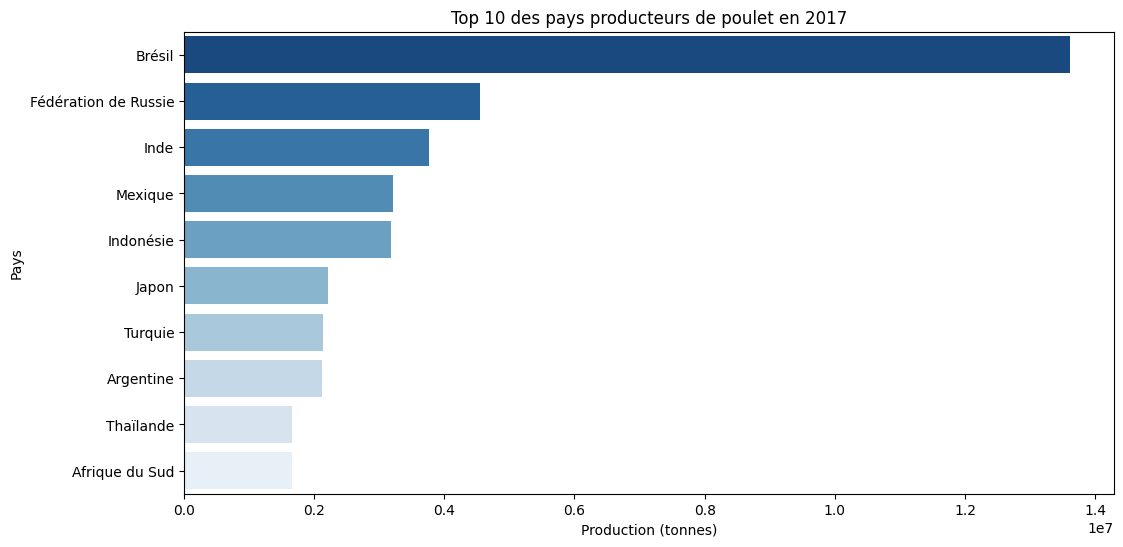

In [36]:
#Top 10 pays producteurs de poulet

top_producers = df_final.sort_values(by="Production poulet (tonnes)", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_producers, x="Production poulet (tonnes)", y="Zone", palette="Blues_r")
plt.title("Top 10 des pays producteurs de poulet en 2017")
plt.xlabel("Production (tonnes)")
plt.ylabel("Pays")
plt.show()

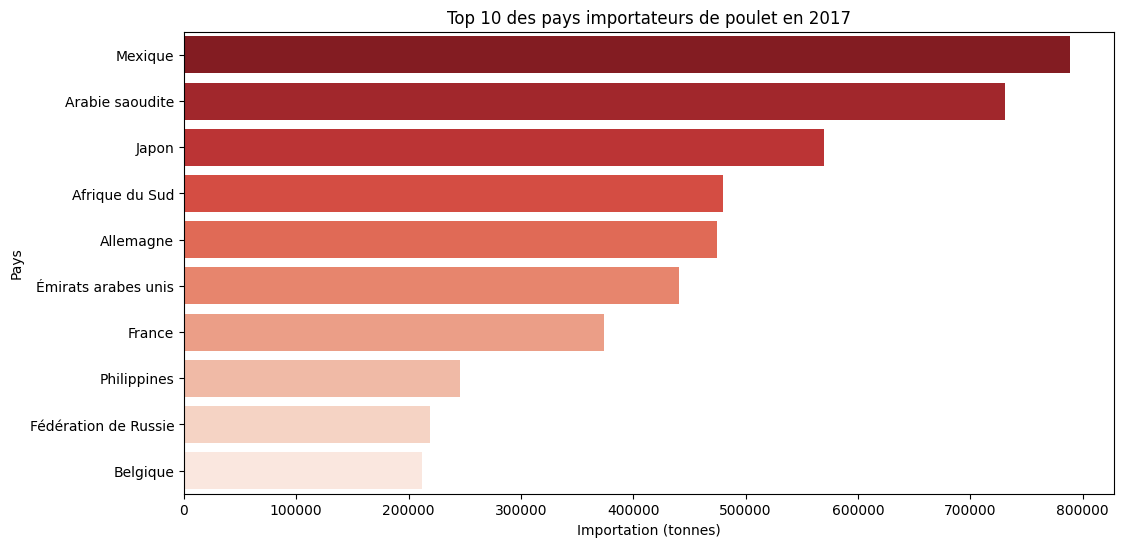

In [37]:
#Top 10 pays importateurs de poulet

top_importers = df_final.sort_values(by="Importation poulet (tonnes)", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_importers, x="Importation poulet (tonnes)", y="Zone", palette="Reds_r")
plt.title("Top 10 des pays importateurs de poulet en 2017")
plt.xlabel("Importation (tonnes)")
plt.ylabel("Pays")
plt.show()


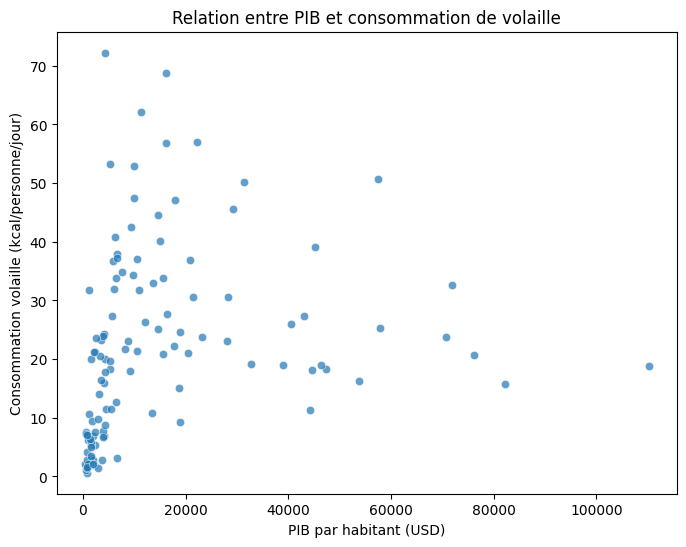

In [38]:
# Corrélation entre PIB et consommation de volaille

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_final, x="PIB par habitant (USD)", y="Consommation volaille (kcal/personne/jour)", alpha=0.7)
plt.title("Relation entre PIB et consommation de volaille")
plt.xlabel("PIB par habitant (USD)")
plt.ylabel("Consommation volaille (kcal/personne/jour)")
plt.show()


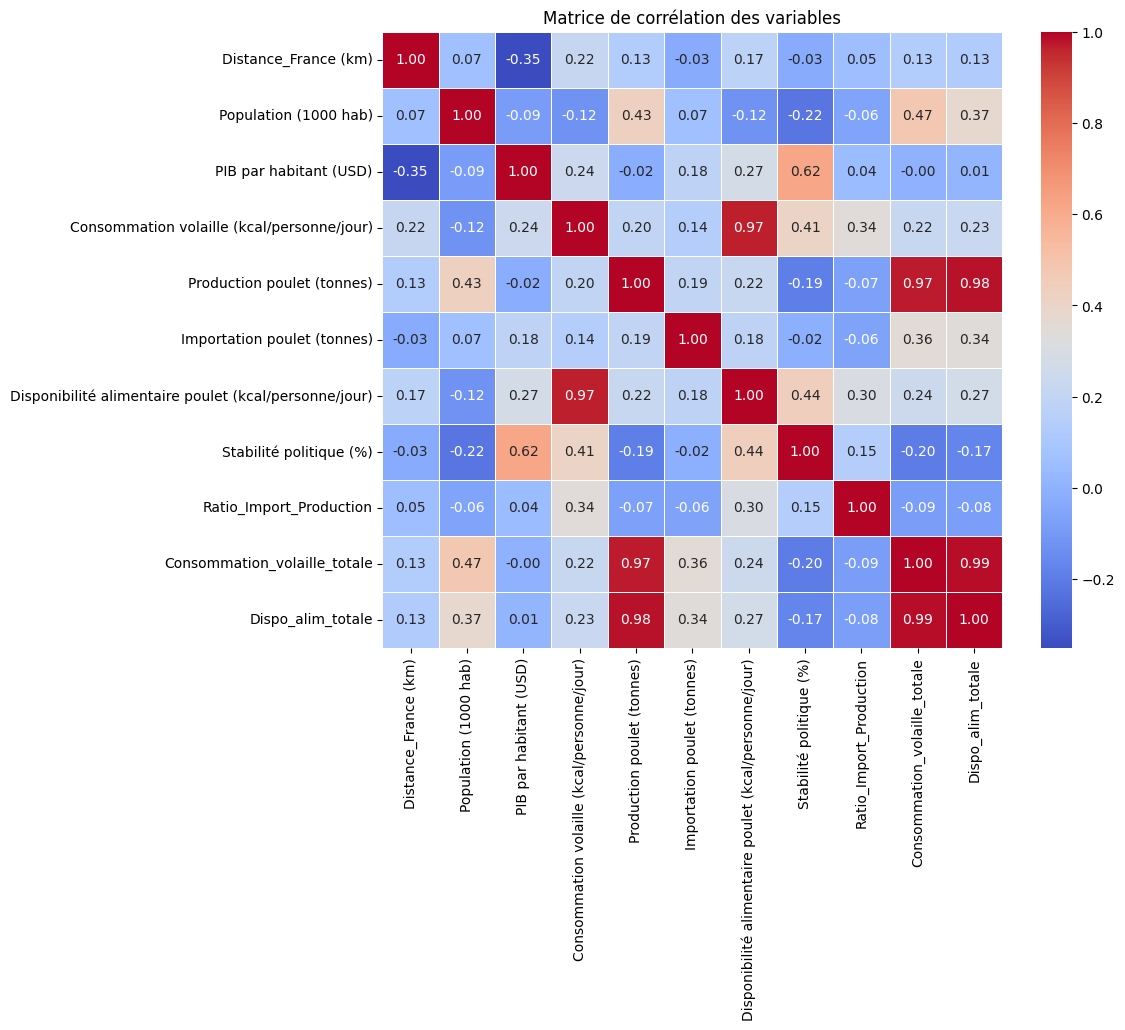

In [39]:
 # Matrice de corrélation (heatmap)

df_corr = df_final.select_dtypes(include=[np.number])  # Sélectionner uniquement les colonnes numériques
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables")
plt.show()


In [40]:
# Exporter df_final en CSV
df_final.to_csv("df_final.csv", index=False)

print("Fichier CSV exporté : df_final.csv")


Fichier CSV exporté : df_final.csv
